# Modeling Strategy Sol

파일 -> .ipynb 다운로드 -> 구글드라이브에 업로드하여 사용

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data Loading

In [0]:
data_path = 'https://raw.githubusercontent.com/RayleighKim/Example_datasets/master/Bike-Sharing-Dataset/hour.csv'
rides = pd.read_csv(data_path)
rides2 = pd.read_csv(data_path)

In [0]:
rides.drop(['casual', 'registered'], axis=1, inplace=True)
rides2.drop(['casual', 'registered'], axis=1, inplace=True)

# CODE 1 :  rides 데이터프레임에 퇴근시간 컬럼을 만들라.

**조건**
1. 17,18,19 시를 퇴근시간이라고 한다.
2. gow 컬럼을 만들고 17, 18, 19 시면 1로 표시. 그렇지 않으면 0으로 표시한다.

In [0]:
## easy sol
rides['gow'] = 0
rides.loc[ rides['hr']==17, ['gow']] = 1
rides.loc[ rides['hr']==18, ['gow']] = 1
rides.loc[ rides['hr']==19, ['gow']] = 1

# rides.loc[ rides['hr'].isin([17,18,19]) ,['gow']] = 1

# Dummy Variable

Season, weathersit, mnth, hr, weekday 등의 Categorical Variable들을 Dummy로 만들어라.

In [0]:
dummy_fields = ['season', 'weathersit', 'mnth', 'hr', 'weekday']
rides = pd.get_dummies(rides, columns=dummy_fields)

fields_to_drop = ['instant', 'dteday', 'atemp', 'workingday']
data = rides.drop(fields_to_drop, axis=1)
data.head()

,yr,holiday,temp,hum,windspeed,cnt,gow,season_1,season_2,season_3,season_4,weathersit_1,weathersit_2,weathersit_3,weathersit_4,mnth_1,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,hr_0,hr_1,hr_2,hr_3,hr_4,hr_5,hr_6,hr_7,hr_8,hr_9,hr_10,hr_11,hr_12,hr_13,hr_14,hr_15,hr_16,hr_17,hr_18,hr_19,hr_20,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0.24,0.81,0.0,16,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0.22,0.80,0.0,40,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0.22,0.80,0.0,32,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0.24,0.75,0.0,13,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0.24,0.75,0.0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


# CODE 2 : rides2[:-81*24]를 rides2에 담고 위의 과정을 진행하여 data2에 담자

* 만들어진 변수의 수는 같은가?
* train/validation/test 를 분리하여 dummy var를 만든 것(Code2, pjt1)과 위의 과정을 비교해보자.
    - 장점
    - 단점

In [0]:
rides2 = rides2[:-81*24]

dummy_fields = ['season', 'weathersit', 'mnth', 'hr', 'weekday']
rides2 = pd.get_dummies(rides2, columns=dummy_fields)

fields_to_drop = ['instant', 'dteday', 'atemp', 'workingday']
data2 = rides2.drop(fields_to_drop, axis=1)
data2.head()

,yr,holiday,temp,hum,windspeed,cnt,season_1,season_2,season_3,season_4,weathersit_1,weathersit_2,weathersit_3,weathersit_4,mnth_1,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,hr_0,hr_1,hr_2,hr_3,hr_4,hr_5,hr_6,hr_7,hr_8,hr_9,hr_10,hr_11,hr_12,hr_13,hr_14,hr_15,hr_16,hr_17,hr_18,hr_19,hr_20,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0.24,0.81,0.0,16,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0.22,0.80,0.0,40,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0.22,0.80,0.0,32,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0.24,0.75,0.0,13,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0.24,0.75,0.0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [0]:
data.columns

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'cnt', 'gow', 'season_1',
       'season_2', 'season_3', 'season_4', 'weathersit_1', 'weathersit_2',
       'weathersit_3', 'weathersit_4', 'mnth_1', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'hr_0', 'hr_1', 'hr_2', 'hr_3', 'hr_4', 'hr_5', 'hr_6',
       'hr_7', 'hr_8', 'hr_9', 'hr_10', 'hr_11', 'hr_12', 'hr_13', 'hr_14',
       'hr_15', 'hr_16', 'hr_17', 'hr_18', 'hr_19', 'hr_20', 'hr_21', 'hr_22',
       'hr_23', 'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6'],
      dtype='object')

In [0]:
data2.columns

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'cnt', 'season_1',
       'season_2', 'season_3', 'season_4', 'weathersit_1', 'weathersit_2',
       'weathersit_3', 'weathersit_4', 'mnth_1', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'hr_0', 'hr_1', 'hr_2', 'hr_3', 'hr_4', 'hr_5', 'hr_6',
       'hr_7', 'hr_8', 'hr_9', 'hr_10', 'hr_11', 'hr_12', 'hr_13', 'hr_14',
       'hr_15', 'hr_16', 'hr_17', 'hr_18', 'hr_19', 'hr_20', 'hr_21', 'hr_22',
       'hr_23', 'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6'],
      dtype='object')

# Scaling


In [0]:
data_origin = data.copy()
data2_origin = data.copy()

In [0]:
quant_features = ['temp', 'hum', 'windspeed']
means = data[quant_features].mean()
std = data[quant_features].std()

data[quant_features] = (data[quant_features] - means)/std


# CODE 3 : data2에 대해서 위 스케일링을 진행하고 비교해보자.

* means2, std2를 선언해보자
* means, std와 비교해보

In [0]:
quant_features = ['temp', 'hum', 'windspeed']
means2 = data2[quant_features].mean()
std2 = data2[quant_features].std()

data2[quant_features] = (data2[quant_features] - means)/std


In [0]:
print(means)
print(means2)

temp         0.496987
hum          0.627229
windspeed    0.190098
dtype: float64
temp         0.513002
hum          0.626437
windspeed    0.190757
dtype: float64


In [0]:
print(std)
print(std2)

temp         0.192556
hum          0.192930
windspeed    0.122340
dtype: float64
temp         0.194913
hum          0.195437
windspeed    0.122189
dtype: float64


### Splitting the data into training, testing, and validation sets

맨 마지막의 21일을 test_set으로, 그리고 마지막의 81~22 (60일)을 validation set으로, 나머지를 Training set으로 둔다.<br>
물론 이것도 [scikit-learn에서 한방](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)에 할 수 있으나 우리는 직접한다!

굳이 Validations set을 왜 사용하는지는, 이론만 달리는 날에 신나고 자세하게 달립시다!

In [0]:
test_data = data[-21*24:]
val_data = data[-81*24:-21*24]
train_data = data[:-81*24]

target_fields = ['cnt']
test_features, test_targets = test_data.drop(target_fields, axis=1), test_data[target_fields]
val_features, val_targets = val_data.drop(target_fields, axis=1), val_data[target_fields]
train_features, train_targets = train_data.drop(target_fields, axis=1), train_data[target_fields]

train_targets.head()

,cnt
0,16
1,40
2,32
3,13
4,1


# Modeling I : simple Linear Regression

## 조건

1. slr 에 linear regression을 선언하고 학습하라.
2. 예측값을 담는다.
    * train_pred : 트레이닝셋의 예측값
    * val_pred : 벨리데이션셋의 예측값
    * test_pred : 테스트셋의 예측값


In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
# 모델 준비
slr = LinearRegression()

# 모델 training
slr.fit(train_features, train_targets)

# Training & Validation set에서의 예측값 준비
train_pred, val_pred = slr.predict(train_features), slr.predict(val_features)
test_pred = slr.predict(test_features)

# validation set 위의 시각화이다. 동작하는지 확인할 것

In [0]:
val_targets.shape

(1440, 1)

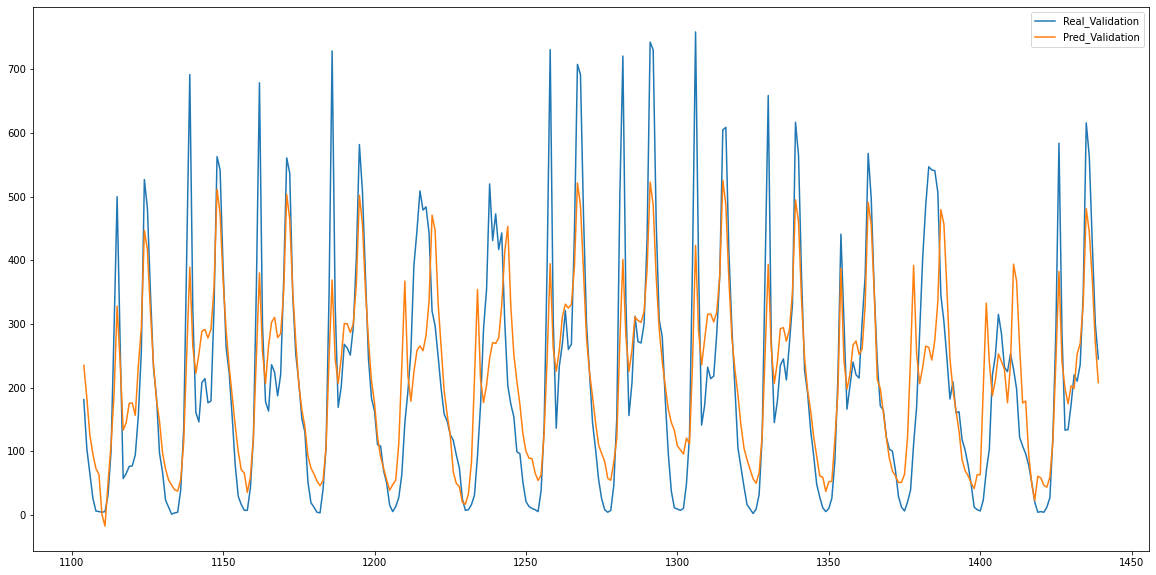

In [0]:
x = list(range(1440))
rd = -24*14

plt.figure(figsize=(20,10))
plt.plot(x[rd:], val_targets['cnt'][rd:] )
plt.plot(x[rd:], val_pred[rd:])
plt.legend(['Real_Validation', 'Pred_Validation'])
plt.show()

# Q1. val_targets 와 val_pred 사이의 rmse를 구하라


In [0]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(val_targets, val_pred))

123.38268492852627

# Q2. val_targets와 val_pred의 퇴근시간때의 rmse를 구하라.
* 다음 코드를 이용하면 편리할 수 있다.

```
val_features['gow']
## 퇴근시간이 1, 나머지가 0으로 되어 있다.
```

In [0]:
gow_real = val_targets[val_features['gow']==1]
gow_pred = val_pred[val_features['gow']==1]

np.sqrt(mean_squared_error(gow_real, gow_pred ))

175.03831334901133

# Q3. val_targets와 val_pred의 퇴근시간이 아닐 때의 rmse를 구하라.

In [0]:
ngow_real = val_targets[val_features['gow']==0]
ngow_pred = val_pred[val_features['gow']==0]

np.sqrt(mean_squared_error(ngow_real, ngow_pred ))

113.925766683449

# Modeling II : 퇴근 시간용 linear regression

1. tlr 에 linear regression을 선언하고 학습하라.
2. 'gow'컬럼을 이용하여 트레이닝 셋에서 퇴근시간만 학습 데이터로 사용한다.
2. 예측값을 담는다.
    * train_pred_t : 트레이닝셋의 예측값
    * val_pred_t : 벨리데이션셋의 예측값

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
# 모델 준비
tlr = LinearRegression()

# 모델 training
tlr.fit(train_features[train_features['gow']==1], train_targets[train_features['gow']==1])

# Training & Validation set에서의 예측값 준비
train_pred_t, val_pred_t = tlr.predict(train_features[train_features['gow']==1]), tlr.predict(val_features[val_features['gow']==1])

# Q4. 퇴근시간의 val_targets와 val_pred_t 사이의 rmse를 구하라.
* 정수만 작성한다!

In [0]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(val_targets[val_features['gow']==1], val_pred_t))

124.99326057651741

# Q5. 2번의 rmse와 4번의 rmse 에 대하여 다음 질문에 답하여라.

## Q5.1 : 개선되었는가?

## Q5.2 : 차이를 구하라.

In [0]:
# 개선됨

175.03831334901133-124.99326057651741

# 175- 124

50.04505277249392

# 참고 퇴근시간 플롯

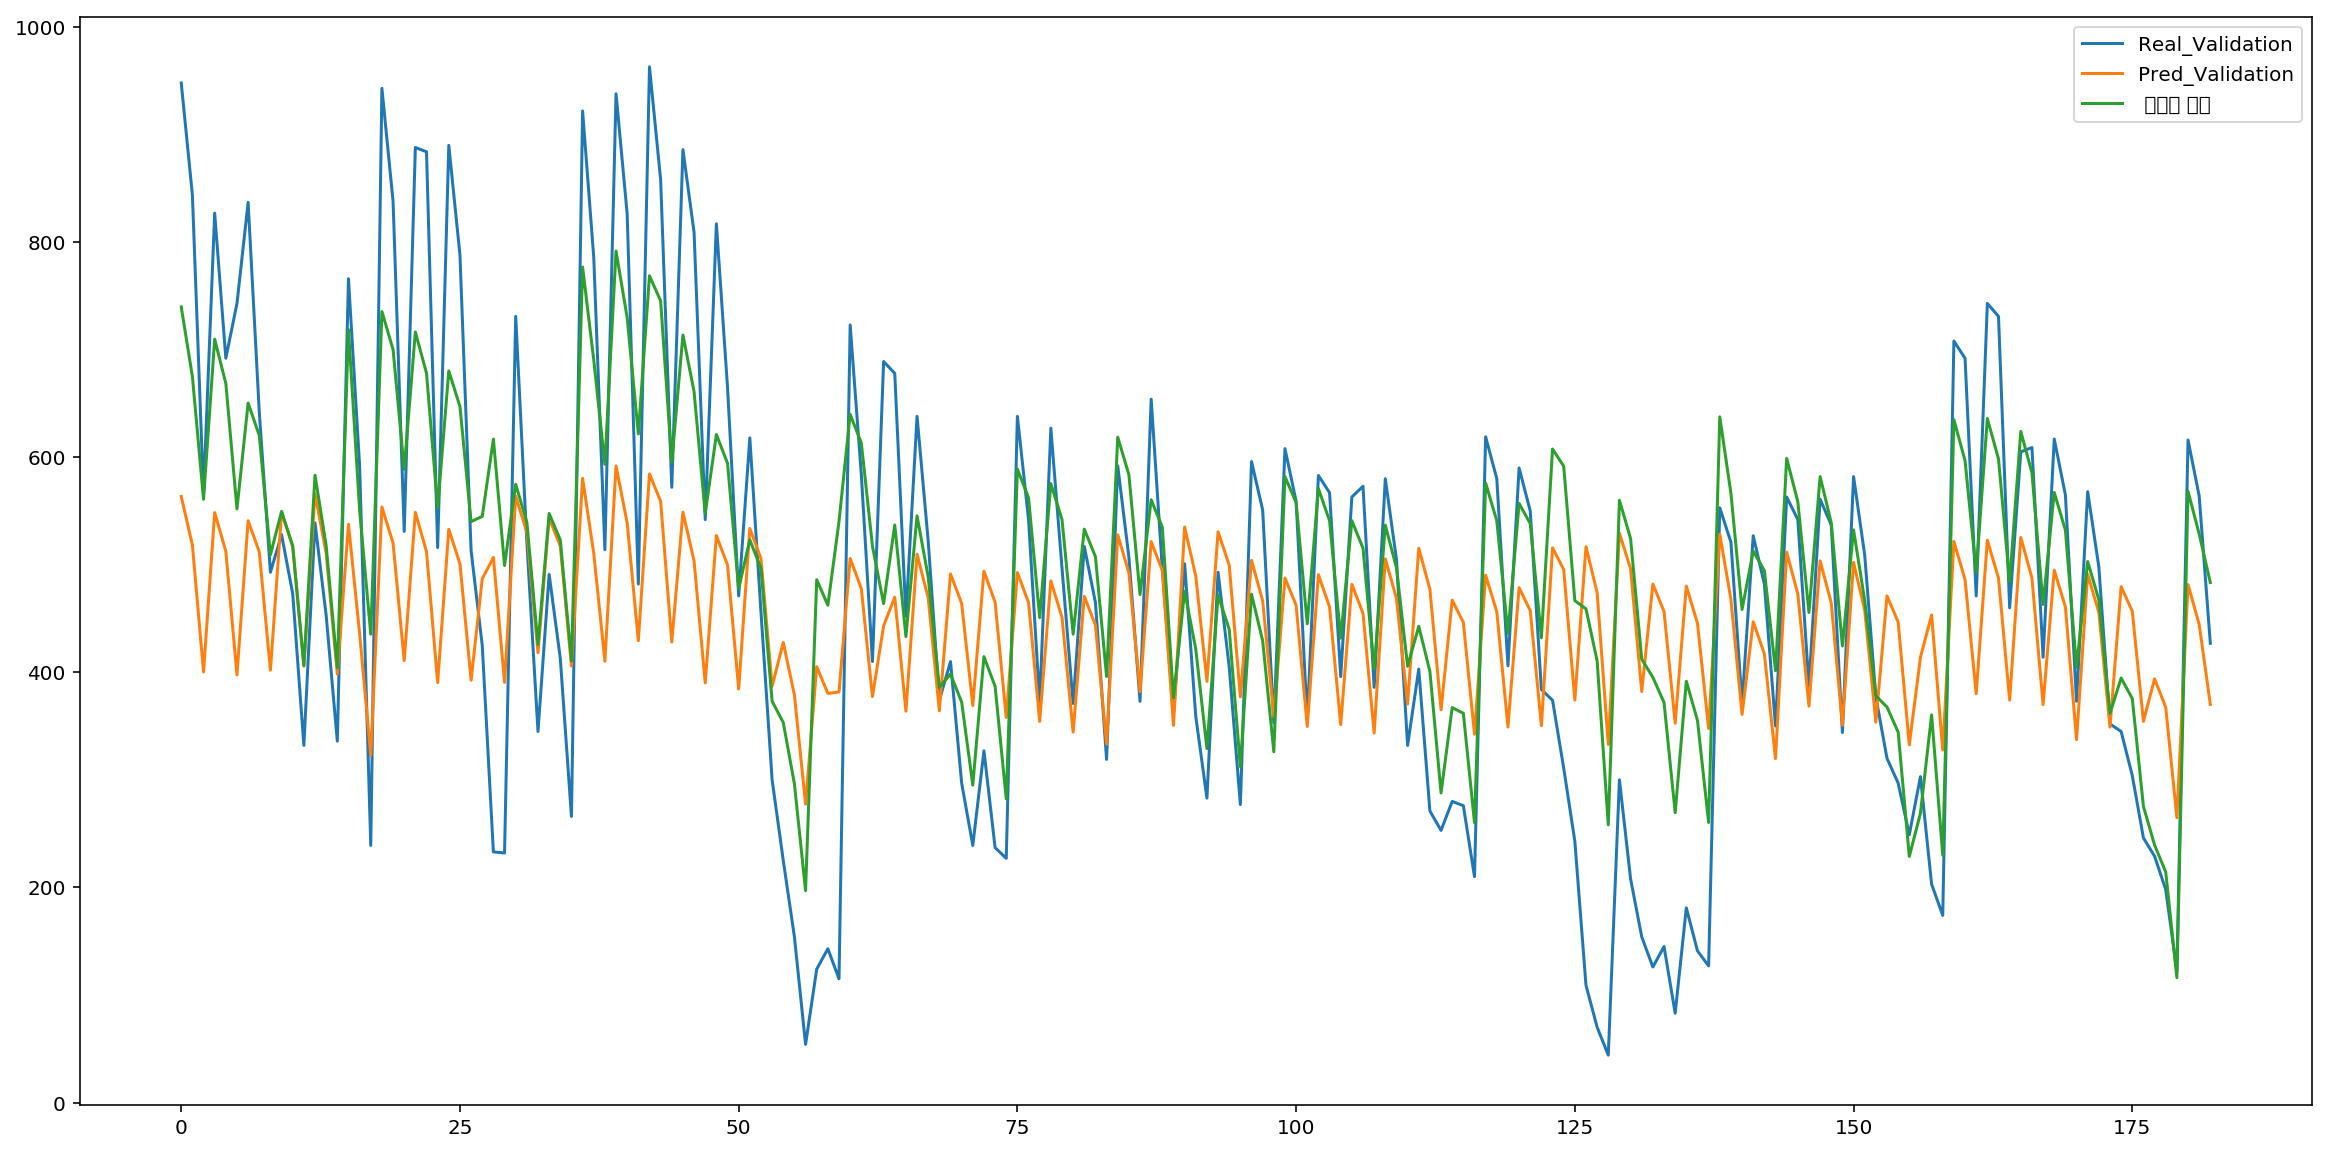

In [0]:
x = list(range(183))

plt.figure(figsize=(20,10))
plt.plot(x, val_targets['cnt'][val_features['gow']==1] )
plt.plot(x, val_pred[val_features['gow']==1])
plt.plot(x, val_pred_t)
plt.legend(['Real_Validation', 'Pred_Validation', ' 퇴근용 예측'])
plt.show()